In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

plt.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

solar = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\\클러스터링\\구역4\\구역4_태양광.csv',
                     encoding='utf-8')
charger = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\클러스터링\\구역4\\구역4_충전소.csv',
                     encoding='utf-8')

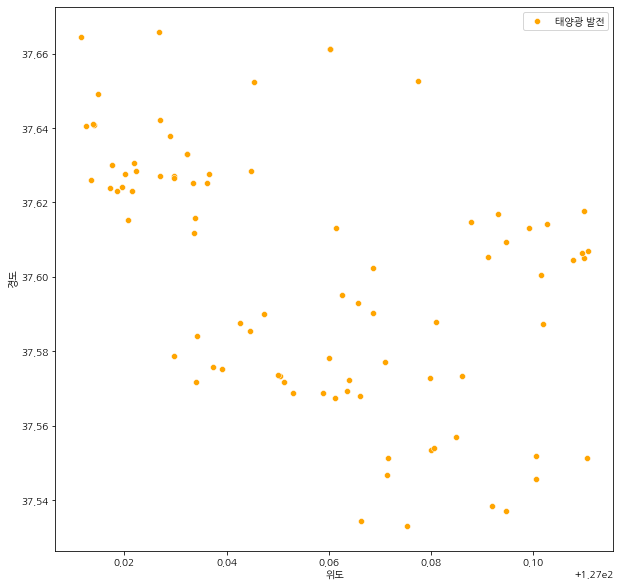

In [15]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=solar, x='x',y='y',color='orange',label='태양광 발전')
#sns.scatterplot(data=charger, x='x',y='y',color='green',label='전기차 충전소')
plt.xlabel('위도')
plt.ylabel('경도')
#plt.yticks(rotation='45')
plt.legend()

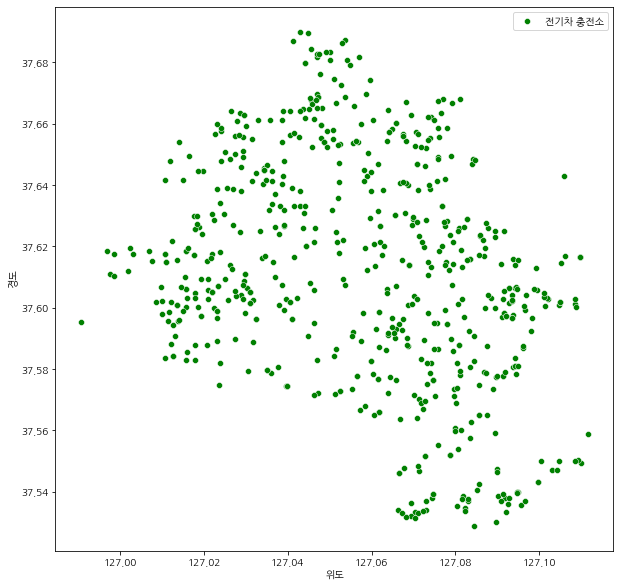

In [16]:
fig = plt.figure(figsize=(10,10))
#sns.scatterplot(data=solar, x='x',y='y',color='orange',label='태양광 발전')
sns.scatterplot(data=charger, x='x',y='y',color='green',label='전기차 충전소')
plt.xlabel('위도')
plt.ylabel('경도')
#plt.yticks(rotation='45')
plt.legend()

In [33]:
import scipy as sp
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

charger_clu = charger[['y','x']]
model_ch = KMeans(n_clusters = 4, algorithm = 'auto')
model_ch.fit(charger_clu)
predict=pd.DataFrame(model_ch.predict(charger_clu))
predict.columns=['predict']

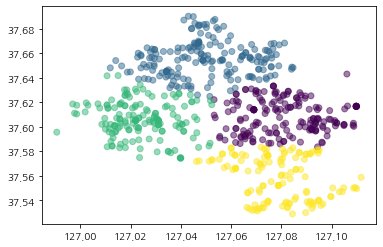

In [34]:
r = pd.concat([charger_clu,predict],axis=1)

plt.scatter(r['x'],r['y'],c=r['predict'],alpha=0.5)

In [35]:
solar_clu = solar[['y','x']]
model_so = KMeans(n_clusters = 5, algorithm = 'auto')
model_so.fit(solar_clu)
predict_solar=pd.DataFrame(model_so.predict(solar_clu))
predict_solar.columns=['predict']

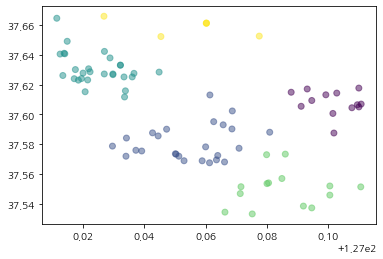

In [36]:
r_solar = pd.concat([solar_clu,predict_solar],axis=1)

plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)

# elbow 기법

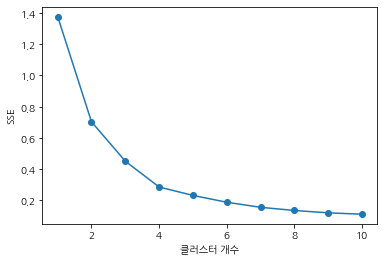

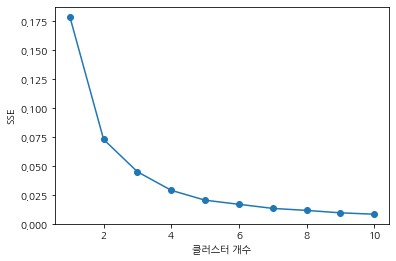

In [30]:
from sklearn.cluster import KMeans

def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++',random_state = 0)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1,11),sse,marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
    
elbow(charger_clu)
elbow(solar_clu)

# Silhouette 기법

In [32]:
from sklearn.metrics import silhouette_score

k_range = range(2,30)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=200)
    kmeans.fit(charger_clu)
    clusters = kmeans.predict(charger_clu)
    
    score = silhouette_score(charger_clu, clusters)
    print('k: ',k,'score: ',score)
    
    if score>best_silhouette_score:
        best_n = k
        best_silhouette_score = score

print('best n: ',best_n, 'best score: ',best_silhouette_score)

k:  2 score:  0.42450996721622786
k:  3 score:  0.4347987691500327
k:  4 score:  0.45774193593330714
k:  5 score:  0.43954491725915235
k:  6 score:  0.41626254303197385
k:  7 score:  0.4256451837864952
k:  8 score:  0.4250091773887681
k:  9 score:  0.40823799548784123
k:  10 score:  0.40840887781184604
k:  11 score:  0.38372282169682237
k:  12 score:  0.4022517493242308
k:  13 score:  0.4115496701846418
k:  14 score:  0.4089140785239521
k:  15 score:  0.41149921034095527
k:  16 score:  0.3917485877004638
k:  17 score:  0.40425639823096543
k:  18 score:  0.3994770114445441
k:  19 score:  0.4085468214900417
k:  20 score:  0.41110433526102713
k:  21 score:  0.41074111527817014
k:  22 score:  0.40294122599401416
k:  23 score:  0.41202170779851827
k:  24 score:  0.4148214153490661
k:  25 score:  0.41726668544902573
k:  26 score:  0.4117567967527832
k:  27 score:  0.4169094271459784
k:  28 score:  0.4209326187972536
k:  29 score:  0.41235398108470356
best n:  4 best score:  0.457741935933307

(array([127.02, 127.03, 127.04, 127.05, 127.06, 127.07, 127.08, 127.09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

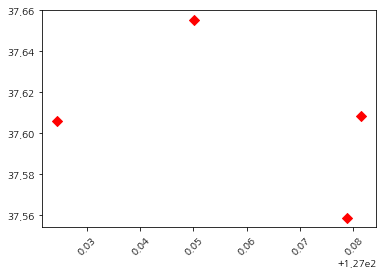

In [37]:
#충전소 centroid
centers_charger = pd.DataFrame(model_ch.cluster_centers_,columns=['y','x'])
center_x = centers_charger['x']
center_y = centers_charger['y']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.xticks(rotation='45')

(array([127.02, 127.03, 127.04, 127.05, 127.06, 127.07, 127.08, 127.09,
        127.1 , 127.11]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

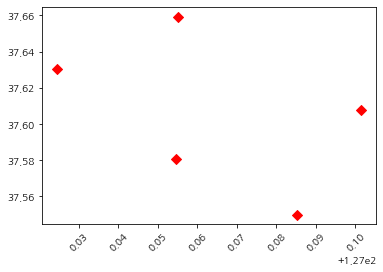

In [38]:
#태양광
centers_solar = pd.DataFrame(model_so.cluster_centers_,columns=['y','x'])
center_x_solar = centers_solar['x']
center_y_solar = centers_solar['y']
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')
plt.xticks(rotation='45')

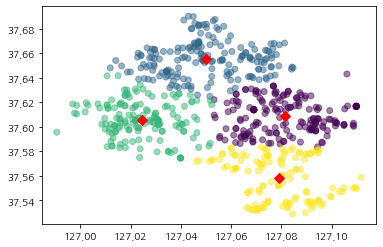

In [39]:
#충전소
plt.scatter(r['x'],r['y'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

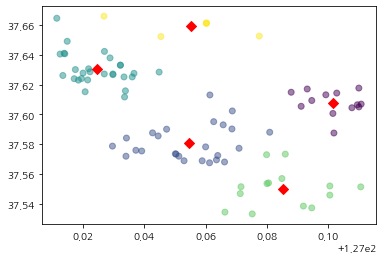

In [40]:
#태양광
plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')

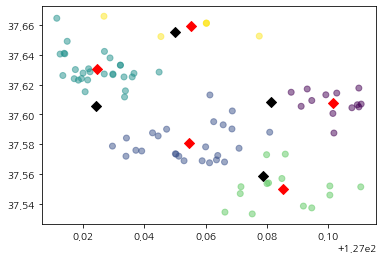

In [41]:
plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')
plt.scatter(center_x,center_y,s=50,marker='D',c='black')

중점:37.60626770722441, 127.0614540824312


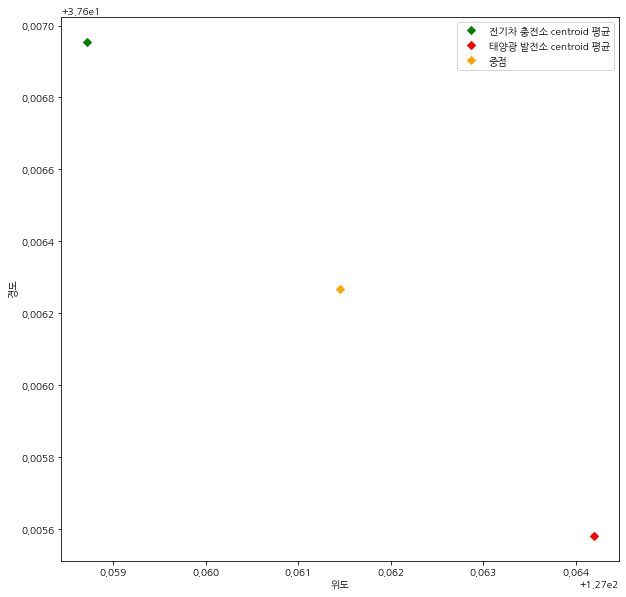

In [42]:
center_x_list = center_x.tolist()
center_y_list = center_y.tolist()

center_x_solar_list = center_x_solar.tolist()
center_y_solar_list = center_y_solar.tolist()


center_x_list = np.array(center_x)
center_y_list = np.array(center_y)

center_x_solar_list = np.array(center_x_solar)
center_y_solar_list = np.array(center_y_solar)

c_x = center_x_list.mean()
c_y = center_y_list.mean()

c_x_s = center_x_solar_list.mean()
c_y_s = center_y_solar_list.mean()

mean_x = (c_x+c_x_s)/2
mean_y = (c_y+c_y_s)/2

print('중점:{0}, {1}'.format(mean_y,mean_x))

fig = plt.figure(figsize=(10,10))
plt.plot(c_x,c_y,'D',color='green',label='전기차 충전소 centroid 평균')
plt.plot(c_x_s, c_y_s, 'D',color= 'red',label='태양광 발전소 centroid 평균')
plt.plot(mean_x, mean_y,'D', color='orange',label='중점')
plt.xlabel('위도')
plt.ylabel('경도')
plt.legend()
plt.show()
#동대문구

In [43]:
#강북구 
#도봉구
#노원구
#성북구
#동대문구
#중랑구
#광진구

area = []

gb_y = 37.6396
gb_x = 127.0257
gb = []
gb.append(gb_y)
gb.append(gb_x)
area.append(gb)

db_y = 37.6688
db_x = 127.0471
db = []
db.append(db_y)
db.append(db_x)
area.append(db)

nw_y = 37.6542
nw_x = 127.0568
nw = []
nw.append(nw_y)
nw.append(nw_x)
area.append(nw)

sb_y = 37.5891
sb_x = 127.0182
sb = []
sb.append(sb_y)
sb.append(sb_x)
area.append(sb)

ddm_y = 37.5744
ddm_x = 127.0400
ddm = []
ddm.append(ddm_y)
ddm.append(ddm_x)
area.append(ddm)

jr_y =37.6066
jr_x = 127.0927
jr = []
jr.append(jr_y)
jr.append(jr_x)
area.append(jr)

gw_y = 37.5385
gw_x = 127.0823
gw = []
gw.append(gw_y)
gw.append(gw_x)
area.append(gw)

area

[[37.6396, 127.0257],
 [37.6688, 127.0471],
 [37.6542, 127.0568],
 [37.5891, 127.0182],
 [37.5744, 127.04],
 [37.6066, 127.0927],
 [37.5385, 127.0823]]

In [44]:
import math

line = []

for i in range(len(area)):
    dist = math.sqrt((c_y_s-area[i][0])**2+(c_x_s-area[i][1])**2)
    line.append(dist)
line

[0.05137522694811482,
 0.06549089940923761,
 0.04917923920572501,
 0.04886097771282509,
 0.0394682813551429,
 0.028520479180610993,
 0.0694799544058205]

In [45]:
print("태양광 최적입지 좌표:{}, {}".format(c_y_s, c_x_s))
print("강북구에서의 거리: {}".format(line[0]))
print("도봉구에서의 거리: {}".format(line[1]))
print("노원구에서의 거리: {}".format(line[2]))
print("성북구에서의 거리: {}".format(line[3]))
print("동대문구에서의 거리: {}".format(line[4]))
print("중랑구에서의 거리: {}".format(line[5]))
print("광진구에서의 거리: {}".format(line[6]))

태양광 최적입지 좌표:37.605580345463224, 127.06419775381978
강북구에서의 거리: 0.05137522694811482
도봉구에서의 거리: 0.06549089940923761
노원구에서의 거리: 0.04917923920572501
성북구에서의 거리: 0.04886097771282509
동대문구에서의 거리: 0.0394682813551429
중랑구에서의 거리: 0.028520479180610993
광진구에서의 거리: 0.0694799544058205
